In [2]:
import pandas as pd

Returned indicates if the product of this particular sale has eventually been returned (1) or not (0).

Shops with a three digit number (100 and above) are webshops.

SaleDocumentNumber indicates a basket of products. As such, lines with the same SaleDocumentNumber can be considered as bought together. If you are unsure about something - feel free to make assumptions, but, as always, mention this in your presentation.

In [5]:
data = pd.read_parquet('transactions_cleaned.parquet')
data['Returned'] = data['Returned'].astype(int)
data['Day'] = data['Order_Date_FK'].dt.day.astype(int)
data['Month'] = data['Order_Date_FK'].dt.month.astype(int)
data['Weekday'] = data['Order_Date_FK'].dt.weekday.astype(int)
#1 if it's a webshop, else 0
data['Webshop'] = data['Shop'].apply(lambda x: 1 if len(x) > 2 else 0)

#OriginalSaleAmountInclVAT in bins per 50 euro
price_ranges = [0, 50, 100, 150, 200, 250]
category_labels = ["0-50", "51-100", "101-150", "151-200", "201-250"]
data['Price_Category'] = pd.cut(data['OriginalSaleAmountInclVAT'], bins=price_ranges, labels=category_labels, right=False)

data.drop(columns=['Order_Date_FK'], inplace=True)
pd.options.display.float_format = '{:.2f}'.format
print(data.head())
data.describe()

  Shop           ProductCode  OriginalSaleAmountInclVAT            CustomerID  \
0   36  -1968361059464632550                      99.95  -2190786785520839526   
1   58  -1745497788861904687                      21.95  -3499949798555834600   
2   49  -4482110002029860032                      69.95  -7841417233849937172   
3   49  -9146072753857637799                      99.95  -7841417233849937172   
4   15  -8829485741699345914                      49.95   7033964597104594686   

  SaleDocumentNumber  Returned  RevenueInclVAT  CostPriceExclVAT  \
0           23995792         0           74.96             36.53   
1           23995794         0           21.95              7.36   
2           23995797         0           38.47             24.41   
3           23995797         0           54.97             32.29   
4           23995798         0           17.48              8.89   

              BrandName            ModelGroup         ProductGroup  Day  \
0   3694837121284491212   316

,OriginalSaleAmountInclVAT,Returned,RevenueInclVAT,CostPriceExclVAT,Day,Month,Weekday,Webshop
count,1759889.00,1759889.00,1759889.00,1759889.00,1759889.00,1759889.00,1759889.00,1759889.00
mean,59.67,0.04,49.03,20.50,14.09,6.70,3.32,0.08
std,32.06,0.19,26.46,13.42,9.01,0.68,1.87,0.28
min,2.95,0.00,0.00,-79.64,1.00,6.00,0.00,0.00
25%,39.95,0.00,29.95,11.04,6.00,6.00,2.00,0.00
50%,59.95,0.00,49.46,20.40,13.00,7.00,4.00,0.00
75%,79.95,0.00,65.95,27.73,22.00,7.00,5.00,0.00
max,250.00,1.00,250.00,1064.25,31.00,8.00,6.00,1.00


In [29]:
pivot1 = data[['Month','Returned']].pivot_table(index='Month', columns='Returned', aggfunc='size')
pivot1['Total'] = pivot1[0] + pivot1[1]
pivot1['Returned_Percentage'] = (pivot1[1] / pivot1['Total']) * 100
pivot1['Not_Returned_Percentage'] = (pivot1[0] / pivot1['Total']) * 100
pivot1

Returned,0,1,Total,Returned_Percentage,Not_Returned_Percentage
Month,,,,,
6,721919,33678,755597,4.46,95.54
7,753970,28646,782616,3.66,96.34
8,216205,5471,221676,2.47,97.53


Although July was the busiest month, percentage returned is lower than in June

In [25]:
print(data['Webshop'].value_counts())

Webshop
0    1610532
1     149357
Name: count, dtype: int64


There are approx 10x more 'real' stores than webshops

In [6]:
pivot1 = data[['Price_Category','Returned']].pivot_table(index='Price_Category', columns='Returned', aggfunc='size')
pivot1['Total'] = pivot1[0] + pivot1[1]
pivot1['Returned_Percentage'] = (pivot1[1] / pivot1['Total']) * 100
pivot1['Not_Returned_Percentage'] = (pivot1[0] / pivot1['Total']) * 100
pivot1



Returned,0,1,Total,Returned_Percentage,Not_Returned_Percentage
Price_Category,,,,,
0-50,724902,23734,748636,3.17,96.83
51-100,857373,37195,894568,4.16,95.84
101-150,93316,5576,98892,5.64,94.36
151-200,15273,1171,16444,7.12,92.88
201-250,1223,119,1342,8.87,91.13


Most sold items are between 50 and 100 euro, with second most sold items between 0 and 50 euro. 

Percentage of returned items increases as price increases.

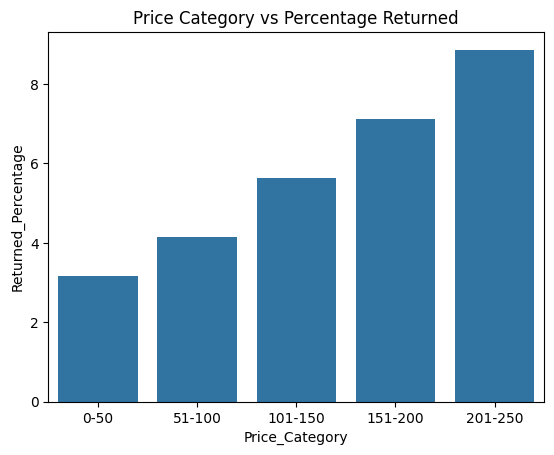

In [8]:
sns.barplot(x='Price_Category', y='Returned_Percentage', data=pivot1)
plt.title('Price Category vs Percentage Returned')
plt.show()

In [33]:
pivot1 = data[['Weekday','Returned']].pivot_table(index='Weekday', columns='Returned', aggfunc='size')
pivot1['Total'] = pivot1[0] + pivot1[1]
pivot1['Returned_Percentage'] = (pivot1[1] / pivot1['Total']) * 100
pivot1['Not_Returned_Percentage'] = (pivot1[0] / pivot1['Total']) * 100
pivot1

Returned,0,1,Total,Returned_Percentage,Not_Returned_Percentage
Weekday,,,,,
0,145948,7437,153385,4.85,95.15
1,219589,10052,229641,4.38,95.62
2,237550,10470,248020,4.22,95.78
3,219320,9702,229022,4.24,95.76
4,260221,10277,270498,3.80,96.20
5,415763,11962,427725,2.80,97.20
6,193703,7895,201598,3.92,96.08


Items bought on weekends(4 = Friday, 5 = Saturday, 6 = Sunday) have lower return rates.

Perhaps because then people have more time to make an informed decision in the weekend?

In [7]:
pivot1 = data[['BrandName','Returned']].pivot_table(index='BrandName', columns='Returned', aggfunc='size')
pivot1['Total'] = pivot1[0] + pivot1[1]
pivot1['Returned_Percentage'] = (pivot1[1] / pivot1['Total']) * 100
pivot1['Not_Returned_Percentage'] = (pivot1[0] / pivot1['Total']) * 100
pivot1

Returned,0,1,Total,Returned_Percentage,Not_Returned_Percentage
BrandName,,,,,
-1027418522342806914,2.00,NaN,NaN,NaN,NaN
-1125747160593961203,322.00,24.00,346.00,6.94,93.06
-1159077491048515811,16149.00,445.00,16594.00,2.68,97.32
-1179193310456922433,53.00,18.00,71.00,25.35,74.65
-1183861844137376173,9.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
946019608772493539,5.00,NaN,NaN,NaN,NaN
96584880849886171,34.00,4.00,38.00,10.53,89.47
98233977284132774,1311.00,56.00,1367.00,4.10,95.90


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
shops = data.groupby(['Shop']).agg({
    'RevenueInclVAT': 'sum',
    'CostPriceExclVAT': 'sum',
    'CustomerID': 'nunique',
    'Webshop': 'first',
    'Returned': lambda x: (x.value_counts() / x.size * 100).tolist()  # [pct kept, pct returned]
})

# Separate the 'Returned' column into two separate columns
shops[['Pct_Kept', 'Pct_Returned']] = pd.DataFrame(shops['Returned'].tolist(), index=shops.index)
shops = shops.drop('Returned', axis=1)


# Rename columns for clarity
shops['Profit'] = shops['RevenueInclVAT'] - shops['CostPriceExclVAT']
shops = shops.sort_values('Profit', ascending=False)
# Display the result
display(shops)

,RevenueInclVAT,CostPriceExclVAT,CustomerID,Webshop,Pct_Kept,Pct_Returned,Profit
Shop,,,,,,,
102,7729916.79,3538239.83,50841,1,81.30,18.70,4191676.96
9,1961631.34,824251.72,7660,0,97.29,2.71,1137379.62
80,1701837.56,719928.20,6813,0,97.94,2.06,981909.36
21,1655826.00,693055.67,6926,0,97.58,2.42,962770.33
60,1608203.64,666137.85,6836,0,98.18,1.82,942065.79
...,...,...,...,...,...,...,...
16,307507.95,210958.01,1,0,97.78,2.22,96549.94
35,77470.45,36098.96,1,0,98.20,1.80,41371.49
38,55028.50,33529.71,1,0,98.18,1.82,21498.79


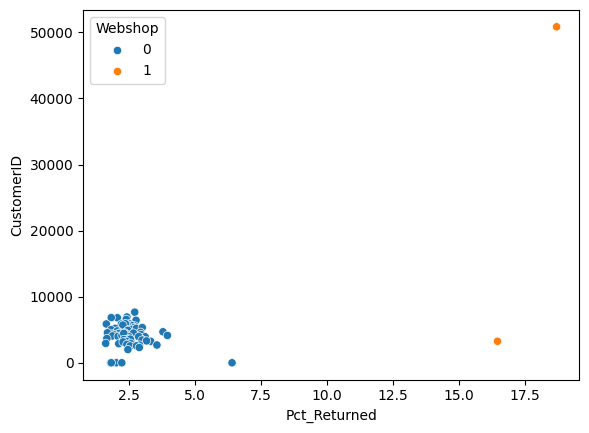

In [124]:
sns.scatterplot(data=shops, x='Pct_Returned', y='CustomerID', hue='Webshop')
plt.show()

This graph shows that online stores have much higher return rates for varying levels of profit.

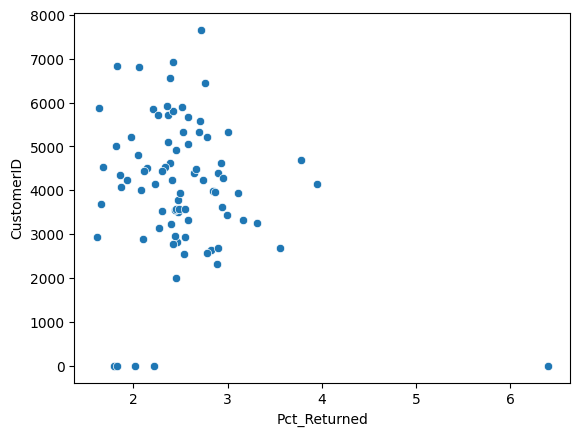

In [126]:
realstores = shops[shops['Webshop'] == 0]
sns.scatterplot(data=realstores, x='Pct_Returned', y='CustomerID')
plt.show()

With 1 exception, all physical stores have a return rate of under 4%.

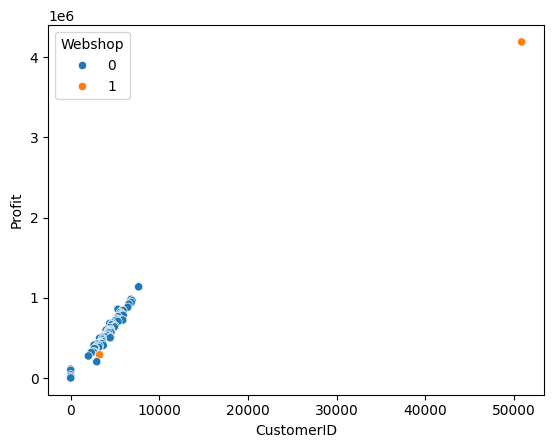

In [118]:
sns.scatterplot(data=shops, x='CustomerID', y='Profit', hue='Webshop')
plt.show()

Dropping shop 102 since it's clearly an outlier by every metric.

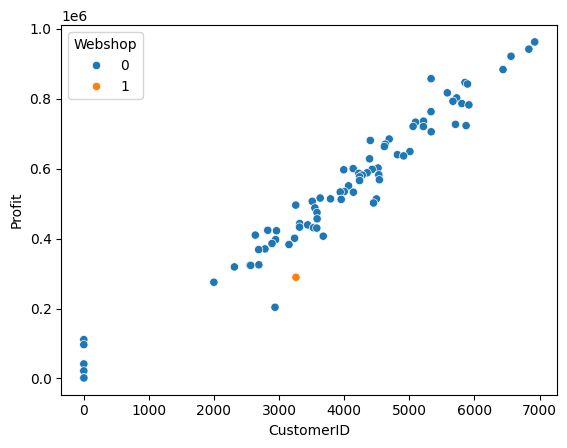

In [119]:
shops1 = shops.iloc[3:]
sns.scatterplot(data=shops1, x='CustomerID', y='Profit', hue='Webshop')
plt.show()
#TODO: formatting, titles

Unsurprisingly, shops with more customers are more profitable.

SUrprisingly, a large amount of non-webshops in the data. 

How are shops counted if they have both?

More data on other costs are needed to calculate actual profit

In [62]:
customers = data.groupby(['CustomerID', 'Month']).agg({
    'SaleDocumentNumber': 'count',
    'Shop': 'nunique',
    'Webshop': 'first'
})
customers = customers.sort_values('SaleDocumentNumber', ascending=False)
display(customers)

SaleDocumentNumber  Shop  Webshop
CustomerID           Month                                   
-5287955982418449235 7                   25232    76        0
                     6                   20850    76        0
                     8                    8195    76        0
-4279123115125507326 6                    7961     1        0
-5274373356868953113 6                    4720     1        0
...                                        ...   ...      ...
-4296357136371128715 6                       1     1        1
200569944941153145   7                       1     1        1
-231685670576532833  7                       1     1        1
2005569045535508253  7                       1     1        1
4772333060968285228  7                       1     1        1

[397766 rows x 3 columns]

In [72]:
customers2 = data.groupby(['CustomerID','Webshop']).agg({
    'SaleDocumentNumber': 'count',
    'Shop': 'nunique',
    'Returned': lambda x: (x.value_counts() / x.size * 100).round(2)  #[pct kept, pct returned]
})
customers2 = customers2.rename(columns={'Returned': 'Return_Percentage'})
customers2 = customers2[customers2['SaleDocumentNumber'] > 10]
customers2 = customers2.sort_values('SaleDocumentNumber', ascending=False)
display(customers2)

SaleDocumentNumber  Shop Return_Percentage
CustomerID           Webshop                                            
-5287955982418449235 1                     35435     1    [85.25, 14.75]
                     0                     18842    75    [86.41, 13.59]
-4279123115125507326 0                      7961     1     [97.78, 2.22]
4572026730515361595  0                      7602     1     [97.05, 2.95]
6455628090489614628  0                      7022     1     [97.89, 2.11]
...                                          ...   ...               ...
-2688530612240496502 1                        11     1    [72.73, 27.27]
5556505572655552653  1                        11     1    [63.64, 36.36]
5074426713860826704  1                        11     1    [81.82, 18.18]
8450085889038030151  1                        11     1    [72.73, 27.27]
8157165449207182744  1                        11     1    [72.73, 27.27]

[15544 rows x 3 columns]

In [99]:
customers2 = data.groupby(['CustomerID', 'Webshop']).agg({
    'SaleDocumentNumber': 'count',
    'Shop': 'nunique',
    'Returned': lambda x: (x.value_counts() / x.size * 100).tolist()  # [pct kept, pct returned]
})

# Separate the 'Returned' column into two separate columns
customers2[['Pct_Kept', 'Pct_Returned']] = pd.DataFrame(customers2['Returned'].tolist(), index=customers2.index)
customers2 = customers2.drop('Returned', axis=1)

customers2 = customers2[customers2['Pct_Returned'] > 10]
customers2 = customers2.sort_values('SaleDocumentNumber', ascending=False)
display(customers2)

SaleDocumentNumber  Shop  Pct_Kept  Pct_Returned
CustomerID           Webshop                                                  
-5287955982418449235 1                     35435     1     85.25         14.75
                     0                     18842    75     86.41         13.59
-4279123115125507326 0                      7961     1     97.78          2.22
4572026730515361595  0                      7602     1     97.05          2.95
6455628090489614628  0                      7022     1     97.89          2.11
...                                          ...   ...       ...           ...
1640577925700165281  1                         2     1     50.00         50.00
-4380896219970462405 1                         2     1     50.00         50.00
7585329314164907552  1                         2     1     50.00         50.00
-1796644800501337226 1                         2     1     50.00         50.00
-4340105534580990005 1                         2     1     50.00         50.00

[20869 rows x 4 columns]

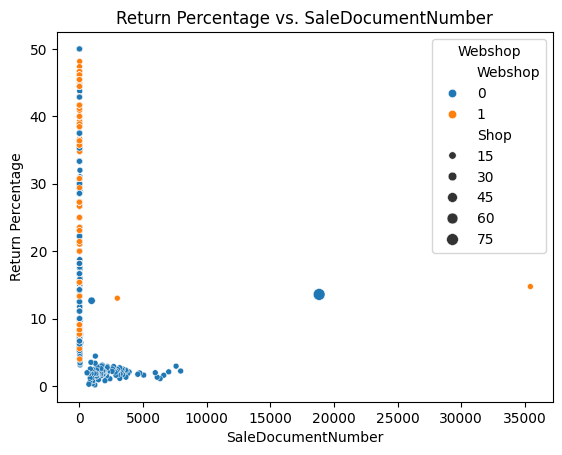

In [109]:
#customers3 = customers2.iloc[2:] # remove the first two rows as they are outliers
customers4 = customers2[customers2['SaleDocumentNumber'] > 10]
sns.scatterplot(data=customers4, x='SaleDocumentNumber', y='Pct_Returned', hue='Webshop', size='Shop')
plt.xlabel('SaleDocumentNumber')
plt.ylabel('Return Percentage')
plt.title('Return Percentage vs. SaleDocumentNumber')
plt.legend(title='Webshop')
plt.show()


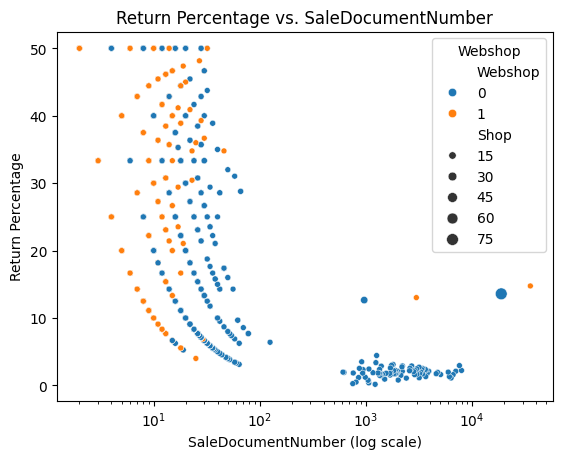

In [111]:
#customers3 = customers2.iloc[2:] # remove the first two rows as they are outliers
customers4 = customers2[customers2['SaleDocumentNumber'] > 0]
sns.scatterplot(data=customers4, x='SaleDocumentNumber', y='Pct_Returned', hue='Webshop', size='Shop')
plt.xlabel('SaleDocumentNumber (log scale)')
plt.ylabel('Return Percentage')
plt.title('Return Percentage vs. SaleDocumentNumber')
plt.xscale('log')
plt.legend(title='Webshop')
plt.show()


This graph shows the amount of orders per user on the X-axis and the return percentage on the Y-axis. The X-axis is log-scaled to have a better overview of the amount of orders. Webshops are colored orange while physical stores are colored blue, and the size of the markers corresponds with the amount of different shops a customer has ordered from.

Returns are highest among customers who order less than 100 items and are divided equally between webshops and physical stores. As the amount of orders per customer decreases, webshops become more prevalent.

With few exceptions, customers who place more than 100 orders do so in physical stores and have the lowest return rates. Customers who placed such high amounts of orders on webshops did show increased return rates.



In [131]:
products = data.groupby(['ProductCode', 'Webshop']).agg({
    'SaleDocumentNumber': 'count',
    'Shop': 'nunique',
    'Returned': lambda x: (x.value_counts() / x.size * 100).tolist()  # [pct kept, pct returned]
})

# Separate the 'Returned' column into two separate columns
products[['Pct_Kept', 'Pct_Returned']] = pd.DataFrame(products['Returned'].tolist(), index=products.index)
products = products.drop('Returned', axis=1)
products = products.sort_values('SaleDocumentNumber', ascending=False)
display(products)

,,SaleDocumentNumber,Shop,Pct_Kept,Pct_Returned
ProductCode,Webshop,,,,
-8705147095127043671,0,15108,77,99.85,0.15
3036892314180591217,0,8535,77,99.84,0.16
-3593338250327416342,0,7738,77,99.29,0.71
-1078666667586201956,0,7519,75,99.81,0.19
8244425463214499805,0,4457,77,99.64,0.36
...,...,...,...,...,...
2201404244167616414,0,1,1,100.00,NaN
5941514400894700453,0,1,1,100.00,NaN
2198812400445525161,0,1,1,100.00,NaN


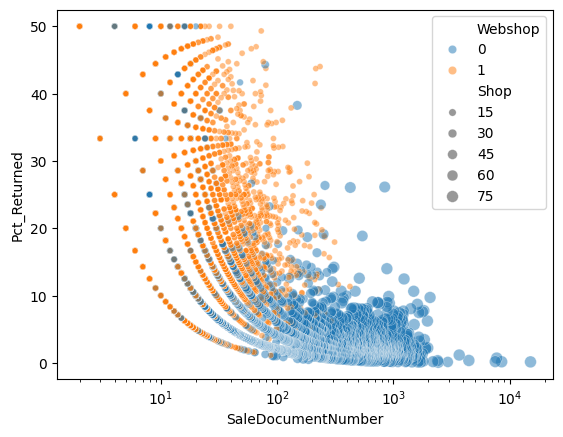

<Figure size 1800x900 with 0 Axes>

In [137]:
sns.scatterplot(data=products, x='SaleDocumentNumber', y='Pct_Returned', hue='Webshop', size='Shop', alpha=0.5)
plt.xscale('log')
plt.figure(figsize=(18, 9))
plt.show()

In [17]:
brands = data.groupby(['BrandName']).agg({
    'RevenueInclVAT': 'sum',
    'SaleDocumentNumber': 'count',
    'CostPriceExclVAT': 'sum',
    'CustomerID': 'nunique',
    'Webshop': 'first',
    'Returned': lambda x: (x.value_counts() / x.size * 100).tolist()  # [pct kept, pct returned]
})

# Separate the 'Returned' column into two separate columns
brands[['Pct_Kept', 'Pct_Returned']] = pd.DataFrame(brands['Returned'].tolist(), index=brands.index)
brands = brands.drop('Returned', axis=1)
display(brands)

,RevenueInclVAT,SaleDocumentNumber,CostPriceExclVAT,CustomerID,Webshop,Pct_Kept,Pct_Returned
BrandName,,,,,,,
-1027418522342806914,40.00,2,160.80,1,0,100.00,NaN
-1125747160593961203,23846.51,346,16140.91,145,0,93.06,6.94
-1159077491048515811,963181.36,16594,403159.59,7020,0,97.32,2.68
-1179193310456922433,6059.43,71,3237.00,43,0,74.65,25.35
-1183861844137376173,1170.00,9,408.42,5,0,100.00,NaN
...,...,...,...,...,...,...,...
946019608772493539,139.96,5,160.88,3,0,100.00,NaN
96584880849886171,3454.54,38,1610.47,18,0,89.47,10.53
98233977284132774,84913.67,1367,30720.94,692,0,95.90,4.10


In [20]:
brands.describe()

,RevenueInclVAT,SaleDocumentNumber,CostPriceExclVAT,CustomerID,Webshop,Pct_Kept,Pct_Returned
count,649.00,649.00,649.00,649.00,649.00,649.00,412.00
mean,132941.23,2711.69,55586.84,1098.21,0.03,95.59,6.95
std,539620.48,10100.53,231439.54,3873.56,0.16,6.40,6.85
min,3.00,1.00,0.00,1.00,0.00,50.00,0.22
25%,362.82,10.00,251.97,5.00,0.00,93.88,2.81
50%,3753.26,89.00,1747.50,43.00,0.00,97.52,5.19
75%,53496.13,1017.00,21817.46,458.00,0.00,100.00,8.28
max,7138087.32,110208.00,3270447.52,41490.00,1.00,100.00,50.00


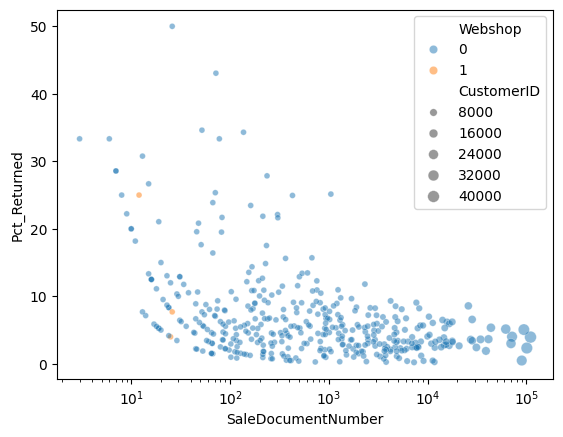

In [19]:
sns.scatterplot(data=brands, x='SaleDocumentNumber', y='Pct_Returned', hue='Webshop', size='CustomerID', alpha=0.5)
plt.xscale('log')
plt.show()